In [11]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeeature

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [12]:
Accra_max = xr.open_dataset("Accra_max.nc")
Accra_max

<xarray.Dataset>
Dimensions:  (time: 15341, lon: 1, lat: 1)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01T15:00:00 ... 2020-12-31T15:00:00
  * lon      (lon) float64 -0.17
  * lat      (lat) float64 5.6
Data variables:
    mx2t     (time, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri Feb 09 11:36:33 2024: cdo remapnn,lon=-0.17/lat=5.60 Gh...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [13]:
Accra_min = xr.open_dataset("Accra_min.nc")
Accra_min

<xarray.Dataset>
Dimensions:  (time: 15340, lon: 1, lat: 1)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-02T06:00:00 ... 2020-12-31T06:00:00
  * lon      (lon) float64 -0.17
  * lat      (lat) float64 5.6
Data variables:
    mn2t     (time, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri Feb 09 11:36:45 2024: cdo remapnn,lon=-0.17/lat=5.60 Gh...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [14]:
monthly_avg_max_temp = Accra_max['mx2t'].groupby('time.month').mean(dim='time')
monthly_avg_max_temp

<xarray.DataArray 'mx2t' (month: 12, lat: 1, lon: 1)>
array([[[27.81491869]],

       [[28.28782464]],

       [[28.64536333]],

       [[28.61323698]],

       [[27.91289165]],

       [[26.40126023]],

       [[24.96863338]],

       [[24.31129489]],

       [[25.16410473]],

       [[26.56033733]],

       [[27.83382493]],

       [[28.18154042]]])
Coordinates:
  * lon      (lon) float64 -0.17
  * lat      (lat) float64 5.6
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:  Maximum temperature at 2 metres since previous post-processing
    units:      K

In [24]:
monthly_avg_max_temp_1 = Accra_max['mx2t'].groupby('time.month').mean(dim='time')
monthly_avg_max_temp_1

<xarray.DataArray 'mx2t' (month: 12, lat: 1, lon: 1)>
array([[[27.81491869]],

       [[28.28782464]],

       [[28.64536333]],

       [[28.61323698]],

       [[27.91289165]],

       [[26.40126023]],

       [[24.96863338]],

       [[24.31129489]],

       [[25.16410473]],

       [[26.56033733]],

       [[27.83382493]],

       [[28.18154042]]])
Coordinates:
  * lon      (lon) float64 -0.17
  * lat      (lat) float64 5.6
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:  Maximum temperature at 2 metres since previous post-processing
    units:      K

In [29]:
# Convert xarray DataArray to pandas DataFrame
monthly_avg_max_temp_df = monthly_avg_max_temp.to_dataframe(name='Max Temperature')
monthly_avg_max_temp_df


,,,Max Temperature
month,lat,lon,
1,5.6,-0.17,27.814919
2,5.6,-0.17,28.287825
3,5.6,-0.17,28.645363
4,5.6,-0.17,28.613237
5,5.6,-0.17,27.912892
6,5.6,-0.17,26.401260
7,5.6,-0.17,24.968633
8,5.6,-0.17,24.311295
9,5.6,-0.17,25.164105


In [30]:
monthly_avg_min_temp_df = monthly_avg_min_temp.to_dataframe(name='Min Temperature')
monthly_avg_min_temp_df

,,,Min Temperature
month,lat,lon,
1,5.6,-0.17,25.432433
2,5.6,-0.17,26.005074
3,5.6,-0.17,26.358538
4,5.6,-0.17,26.344092
5,5.6,-0.17,25.848921
6,5.6,-0.17,24.785239
7,5.6,-0.17,23.706218
8,5.6,-0.17,23.080274
9,5.6,-0.17,23.696475


<Figure size 1000x500 with 0 Axes>

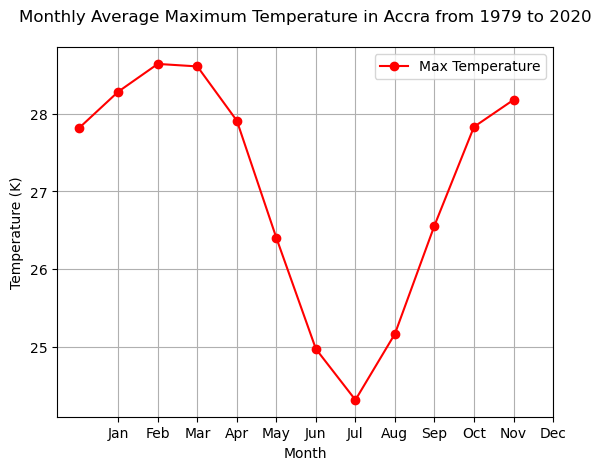

In [36]:
# Plotting the monthly climatological temperature averages for maximum temperature
plt.figure(figsize=(10, 5))
monthly_avg_max_temp_df.plot(marker='o', color='red')
plt.title('Monthly Average Maximum Temperature in Accra from 1979 to 2020\n')
plt.xlabel('Month')
plt.ylabel('Temperature (K)')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend
plt.show()

In [26]:
monthly_avg_min_temp_2 = Accra_min['mn2t'].groupby('time.month').mean(dim='time')
monthly_avg_min_temp_2

<xarray.DataArray 'mn2t' (month: 12, lat: 1, lon: 1)>
array([[[25.43243302]],

       [[26.00507443]],

       [[26.35853808]],

       [[26.3440922 ]],

       [[25.84892059]],

       [[24.78523909]],

       [[23.70621782]],

       [[23.08027389]],

       [[23.69647501]],

       [[24.58238373]],

       [[25.50468733]],

       [[25.68528823]]])
Coordinates:
  * lon      (lon) float64 -0.17
  * lat      (lat) float64 5.6
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:  Minimum temperature at 2 metres since previous post-processing
    units:      K

<Figure size 1000x500 with 0 Axes>

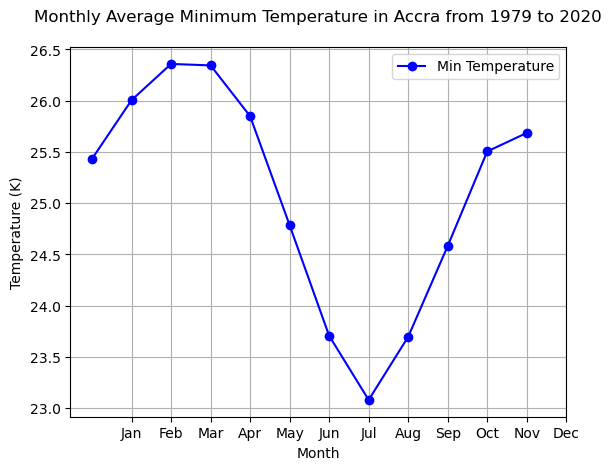

In [33]:
plt.figure(figsize=(10, 5))
monthly_avg_min_temp_df.plot(marker='o', color='blue')
plt.title('Monthly Average Minimum Temperature in Accra from 1979 to 2020\n')
plt.xlabel('Month')
plt.ylabel('Temperature (K)')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()
